In [87]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

plt.style.use("fivethirtyeight")

colors = ["Teal","Indigo","HotPink","DarkGoldenRod","Coral"]

Data is prepared as it has been provided by Bülent Esen's notebook https://www.kaggle.com/bulentesen/cardiac-arrythmia-naive-bayes-v2 who is the publisher of the dataset. No further data preparation besides the ones in cell 8 were not pursued since the data preparataion should be at it's best under the owner's own usage.

In [88]:
print(os.listdir('/'))

['$RECYCLE.BIN', 'android-x86-9.0-r2.iso', 'apache-jmeter-5.5', 'Files', 'kali-linux-2022.3-installer-amd64.iso', 'Student-Management-System-in-Python-main', 'System Volume Information', 'Windows10 x64(19045.2075).ISO', 'XuJiantao', '虚拟机VMware 15.5.0', '虚拟机VMware 15.5.0.zip']


Data is a .CSV file which contains all the possible instructions that can be obtained from ECG readings. However some of the columns have unreliable data (nulls and just vectors of singular values to be exact). So the owner of the dataset seems to drop these columns not applying any interpolation implementation. So, this notebook doesn't follow any interpolation measure either.

In [89]:
df = pd.read_csv('data_arrhythmia.csv', delimiter=';')
df.dtypes

age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
                 ...   
LD              float64
LE              float64
LF              float64
LG              float64
diagnosis         int64
Length: 280, dtype: object

In [90]:
# df中全是0的列名
df.loc[:,(df==0).all()].columns
# df中存在？的列名
#df.loc[:,(df=='?').any()].columns
#df.head(20)

Index(['S'_wave', 'CB', 'CD', 'CS', 'EV', 'EY', 'FF', 'FH', 'FJ', 'FL', 'FS',
       'FZ', 'GA', 'GH', 'IB', 'KP', 'LC'],
      dtype='object')

In [91]:
#inplace=True原地操作值，节省内存
#axis=1时，沿着每一行或者列标签向右执行。
df.drop(["J","R'_wave","S'_wave", "AB", "AC", "AD","AE", "AF", "AG", "AL", "AN", "AO", "AP", "AR", "AS", "AT", "AZ", "AB'", "BC", "BD", "BE", "BG", "BH", "BP", "BR", "BS", "BT", "BU",
          "CA", "CD", "CE", "Cf", "CG", "CH", "CI", "CM","CN","CP","CR","CS","CT","CU","CV","DE","DF","DG","DH","DI","DJ","DR","DS","DT","DU","DV","DY","EG",
          "EH", "EL", "ER", "ET", "EU", "EV", "EY", "EZ", "FA", "FE", "FF", "FH", "FI", "FJ", "FK", "FL", "FM", "FR", "FS", "FU", "FV", "FY", "FZ", "GA",
          "GB", "GG", "GH", "HD", "HE", "HO", "IA", "IB", "IK", "IL", "IY", "JI", "JS", "JT", "KF", "KO", "KP", "LB", "LC", "T", "P", "QRST", "heart_rate"], axis=1, inplace=True)

In [92]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KU,KV,KY,KZ,LA,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,62.9,-0.3,0.0,9.0,-0.9,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,43.4,-0.5,0.0,8.5,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,48.2,0.9,0.0,9.5,-2.4,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,68.0,0.1,0.0,12.2,-2.2,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,48.9,-0.4,0.0,13.1,-3.6,-0.1,3.9,25.4,62.8,7


Further investigating the data have revealed there are some odd entries for the entries that are made presumably for babies which is handled manually. https://www.kaggle.com/mtavares51/binary-classification-on-arrhythmia-dataset

In [93]:
df['height'].value_counts().sort_index()

105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
608     1
780     1
Name: height, dtype: int64

In [94]:
df.loc[df["height"] == 608, "height"] = 61
df.loc[df["height"] == 780, "height"] = 78
df['height'].value_counts().sort_index()

61      1
78      1
105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
Name: height, dtype: int64

There are 16 classes as follows
<ol>
<li>Normal                     </li>
<li>Ischemic changes (Coronary Artery Disease</li>
<li>Old Anterior Myocardial Infarction     </li>
<li>Old Inferior Myocardial Infarction     </li>
<li>Sinus tachycardy                 </li>
<li>Sinus bradycardy                 </li>
<li>Ventricular Premature Contraction (PVC)</li>
<li>Supraventricular Premature Contraction </li>
<li>Left bundle branch block                 </li>
<li>Right bundle branch block             </li>
<li>1. degree AtrioVentricular block            </li>
<li>2. degree AV block             </li>
<li>3. degree AV block             </li>
<li>Left ventricule hypertrophy          </li>
<li>Atrial Fibrillation or Flutter         </li>
<li>Others                     </li>
</ol>

However only first one is a normal kind of arrythmia where the other classes can be superclassed as risky arrythmia cases. In this notebook, all cases are classified as either normal or risky. Risky being the positive (True) case and normal being the negative (False) case, diagnosis column is reworked as follows.

In [95]:
norm_risk_list = []
for diagnose in df.diagnosis:
    if diagnose == 1:
        norm_risk_list.append(True)
    else:
        norm_risk_list.append(False)
df["label"] = np.array(norm_risk_list)
df.drop(columns = ["diagnosis"],inplace = True)
df.label.value_counts()

True     245
False    207
Name: label, dtype: int64

X is formed by importing every data at first. All the dimensionality reduction will be applied afterwards. Y is the label column.

In [96]:
# -1是删除最后一列
X = df.drop(columns = [df.columns[-1]])
y = df[df.columns[-1]]

print(X.head(5))
print(y.shape)

   age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
0   75    0     190      80            91           193           371   
1   56    1     165      64            81           174           401   
2   54    0     172      95           138           163           386   
3   55    0     175      94           100           202           380   
4   75    0     190      80            88           181           360   

   t_interval  p_interval  qrs  ...    KT    KU   KV   KY    KZ   LA   LD  \
0         174         121  -16  ...  25.5  62.9 -0.3  0.0   9.0 -0.9  0.9   
1         149          39   25  ...  21.6  43.4 -0.5  0.0   8.5  0.0  0.2   
2         185         102   96  ...  11.5  48.2  0.9  0.0   9.5 -2.4  0.3   
3         179         143   28  ...  36.8  68.0  0.1  0.0  12.2 -2.2  0.4   
4         177         103  -16  ...  21.7  48.9 -0.4  0.0  13.1 -3.6 -0.1   

    LE    LF    LG  
0  2.9  23.3  49.4  
1  2.1  20.4  38.8  
2  3.4  12.3  49.0  
3  2.6  34.6  

A train test split have been implemented with 0.2 test_size value.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(361, 176)
(361,)
(91, 176)
(91,)


For every column, a MinMaxScaler have been implemented

In [98]:
#MinMaxScaler归一化处理
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

All model names are inputted for demonstration use afterwards.

In [99]:
model_names = ["K-Nearest Neighbors",
               "Decision Tree Classifier",
               "Random Forest Classifier",
               "SVM",
               "Gaussian Naive Bayes"]

models = []
predictions = []
pred_probabilities = []

LogisticRegression have been trained.

In [100]:
log_model = LogisticRegression(random_state=0,solver = "saga")
models.append(log_model)
log_model.fit(X_train, y_train)
log_predprob = log_model.predict_proba(X_test)
pred_probabilities.append(log_predprob)
log_pred = log_model.predict(X_test)
predictions.append(log_pred)
print("The label that predicts the unknown data is：\n",log_model.predict([[56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7]]))

The label that predicts the unknown data is：
 [False]


D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KNeighborsClassifier model have been trained

In [101]:
knn_model = KNeighborsClassifier(n_neighbors=50)
models.append(knn_model)
knn_model.fit(X_train, y_train)
knn_predprob = knn_model.predict_proba(X_test)
pred_probabilities.append(knn_predprob)
knn_pred = knn_model.predict(X_test)
predictions.append(knn_pred)
print("The label that predicts the unknown data is：\n",knn_model.predict([[56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7]]))

The label that predicts the unknown data is：
 [False]


The cell below checks for a range of n_neighbors values and picking the best n_neighbors with the highest AUROC result. Commented out since it's implemented above manually however it's left here for demonstration purposes

In [102]:
#检查最优的n_neighbors值
best_score = -np.inf
best_n = np.inf
for n in range(1,df.columns.shape[0]):
   temp_model = KNeighborsClassifier(n_neighbors=n)
   print(n,end=" ")
   temp_model.fit(X_train, y_train)
   temp_predprob = temp_model.predict_proba(X_test)
   temp_score = roc_auc_score(y_test,temp_predprob[:, 1])
   if temp_score > best_score:
           best_score = temp_score
           best_n = n
print("Best performing number of n_neighbors is",best_n,"scoring",round(best_score * 100 , 2))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 Best performing number of n_neighbors is 50 scoring 81.68




DecisionTreeClassifier model have been trained

In [103]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth = 8,max_features="auto")
models.append(tree_model)
tree_model.fit(X_train, y_train)
tree_predprob = tree_model.predict_proba(X_test)
pred_probabilities.append(tree_predprob)
tree_pred = tree_model.predict(X_test)
predictions.append(tree_pred)
print("The label that predicts the unknown data is：\n",knn_model.predict([[56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7]]))

The label that predicts the unknown data is：
 [False]


D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


The cell below checks for a range of max_depth values and picking the best n_neighbors with the highest AUROC result. Commented out since it's implemented above manually however it's left here for demonstration purposes

In [104]:
#检查最优的max_depth值
best_score = -np.inf
best_n = np.inf
for n in range(1,df.columns.shape[0]):
   temp_tree_model = DecisionTreeClassifier(random_state=0,max_depth = n,max_features="auto")
   print(n,end=" ")
   temp_tree_model.fit(X_train, y_train)
   temp_tree_predprob = temp_tree_model.predict_proba(X_test)
   temp_score = roc_auc_score(y_test,temp_tree_predprob[:, 1])
   if temp_score > best_score:
           best_score = temp_score
           best_n = n
print("Best performing number of max_depth is",best_n,"scoring",round(best_score * 100 , 2))

D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 

D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 

D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 Best performing number of max_depth is 8 scoring 77.87


D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

RandomForestClassifier model have been trained

In [105]:
rndfor_model = RandomForestClassifier(max_depth=9, random_state=0,n_estimators = 100)
models.append(rndfor_model)
rndfor_model.fit(X_train, y_train)
rndfor_predprob = rndfor_model.predict_proba(X_test)
pred_probabilities.append(rndfor_predprob)
rndfor_pred = rndfor_model.predict(X_test)
predictions.append(rndfor_pred)
print("The label that predicts the unknown data is：\n",knn_model.predict([[56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7]]))

The label that predicts the unknown data is：
 [False]


The cell below checks for a range of max_depth values and picking the best n_neighbors with the highest AUROC result. Commented out since it's implemented above manually however it's left here for demonstration purposes

In [106]:
#检查最优的max_depth值
best_score = -np.inf
best_n = np.inf
for n in range(1,df.columns.shape[0]):
   temp_tree_model = RandomForestClassifier(max_depth=n, random_state=0,n_estimators = 100)
   print(n,end=" ")
   temp_tree_model.fit(X_train, y_train)
   temp_tree_predprob = temp_tree_model.predict_proba(X_test)
   temp_score = roc_auc_score(y_test,temp_tree_predprob[:, 1])
   if temp_score > best_score:
           best_score = temp_score
           best_n = n
# print("Best performing number of max_depth is",best_n,"scoring",round(best_score * 100 , 2))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 Best performing number of max_depth is 9 scoring 81.58


In [107]:
#Below is SVM
from sklearn.svm import SVC
svm_model =  SVC(probability=True)
models.append(svm_model)
svm_model.fit(X_train, y_train)
svm_predprob = svm_model.predict_proba(X_test)
pred_probabilities.append(svm_predprob)
svm_pred = svm_model.predict(X_test)
predictions.append(svm_pred)

GaussianNB model have been trained

In [108]:
#GaussianNB
nb_model = GaussianNB(var_smoothing = 0.00001)
models.append(nb_model)
nb_model.fit(X_train, y_train)
nb_predprob = nb_model.predict_proba(X_test)
pred_probabilities.append(nb_predprob)
nb_pred = nb_model.predict(X_test)
predictions.append(nb_pred)
nb_predprob.shape


(91, 2)

Just for demonstration accuracy scores have been demonstrated however ignored in fine-tuning to create a mor clinically applicable model favoring a varibale threshold rather than a 50 % fixed threshold.

In [109]:
#测试集的预测准确性
#AUC(area under the curve)曲线下面积，AUC在机器学习领域中是一种模型评估指标。
#ROC（receiver operating characteristic curve）受试者特征曲线
for name,pred in zip(model_names,predictions):
    print(name,"Accuracy:",round(accuracy_score(y_test,pred) * 100 , 2),"%")

K-Nearest Neighbors Accuracy: 74.73 %
Decision Tree Classifier Accuracy: 62.64 %
Random Forest Classifier Accuracy: 73.63 %
SVM Accuracy: 74.73 %
Gaussian Naive Bayes Accuracy: 75.82 %


For each model AUROC scores are as below.

In [110]:
for name,pred in zip(model_names,pred_probabilities):
    print(name,"AUROC:",round(roc_auc_score(y_test,pred[:, 1]) * 100 , 2),"%")

K-Nearest Neighbors AUROC: 78.72 %
Decision Tree Classifier AUROC: 81.68 %
Random Forest Classifier AUROC: 77.87 %
SVM AUROC: 81.58 %
Gaussian Naive Bayes AUROC: 79.83 %


For each model, a ROC curve have been created using Scikit-Learn's own roc_curve function and stylized for demstrative purposes. Each plot has AUROC score in the title as well as an indicator of how many components in PCA have been chosen (in this case none chosen).

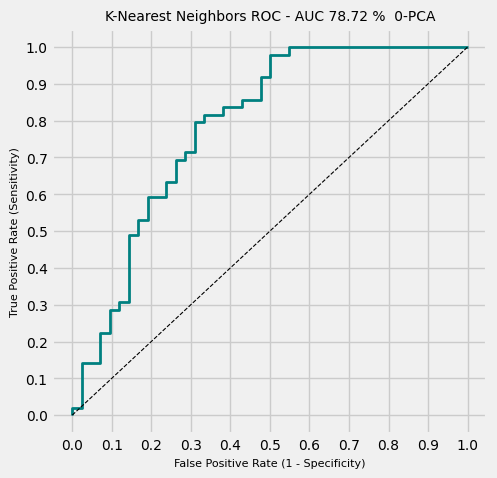

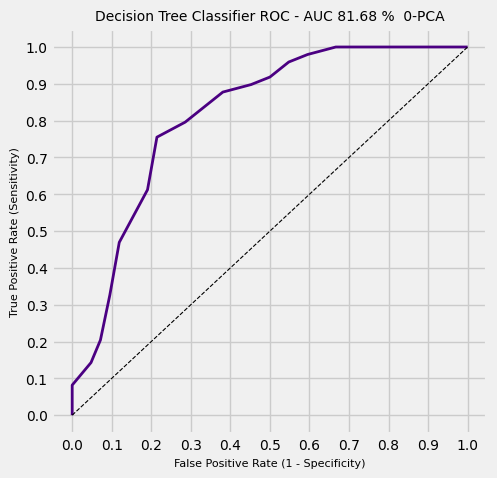

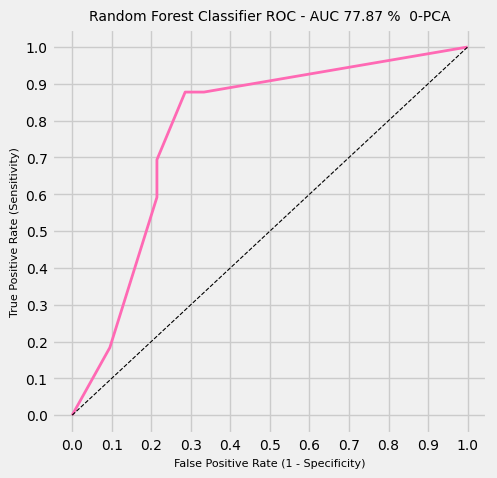

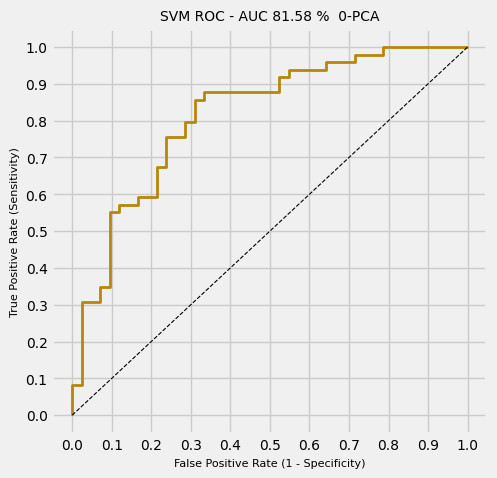

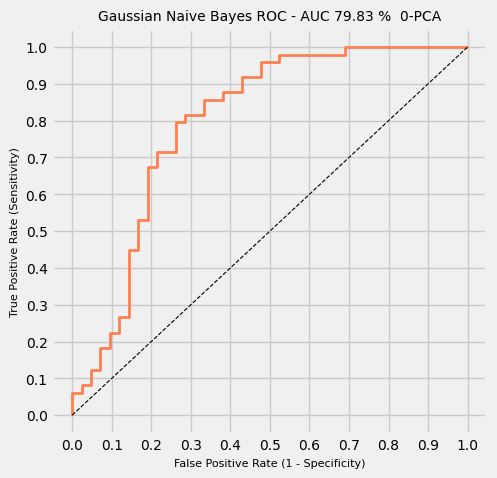

IndexError: list index out of range

<Figure size 500x500 with 0 Axes>

In [112]:
fprs = []
tprs = []
for i, pred in enumerate(pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred[:, 1],drop_intermediate = False)
    fprs.append(fpr)
    tprs.append(tpr)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, color=colors[i], lw=2)
    plt.plot([0,1],[0,1],linestyle='--', color='black', lw=.8)
    plt.title(model_names[i] + " ROC - AUC " + str(round(roc_auc_score(y_true=y_test,y_score=pred[:,1]) * 100,2)) + " % " + " 0-PCA",fontsize=10)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=8)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=8)
    plt.xticks([x / 10 for x in range(0,11)], fontsize=10)
    plt.yticks([x / 10 for x in range(0,11)], fontsize=10)
    plt.show()

For each model, the cell above finds the best performing number of components in PCA. In this way, each model has their own best performing dataset and using features as much as they need to further optimize AUROC score.

In [113]:
#PCA:Principal component analysis主元分析法，主要用于数据降维
from sklearn.decomposition import PCA
best_scores = []
best_ns = []

for i, model in enumerate(models):
    best_score = -np.inf
    best_n = np.inf
    for n in range(1,df.columns.shape[0]):
        pca = PCA(n_components=n,random_state = 0)
        temp_X_train = pca.fit_transform(X_train)
        temp_X_test = pca.transform(X_test)
        model.fit(temp_X_train,y_train)
        temp_pred = model.predict_proba(temp_X_test)
        temp_score = roc_auc_score(y_test,temp_pred[:, 1])
        if temp_score > best_score:
            best_score = temp_score
            best_n = n
    print("Best performing number of components for",model_names[i],"is",best_n,"scoring",round(best_score * 100 , 2))
    best_scores.append(best_score)
    best_ns.append(best_n)

Best performing number of components for K-Nearest Neighbors is 46 scoring 79.59
Best performing number of components for Decision Tree Classifier is 72 scoring 81.88


D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

Best performing number of components for Random Forest Classifier is 15 scoring 76.48
Best performing number of components for SVM is 132 scoring 84.06
Best performing number of components for Gaussian Naive Bayes is 29 scoring 82.6


IndexError: list index out of range

The cell below computes a common number of components which all models perform the best in average. Although this approach limits the performance of each model on their own, it demonstrates how much of the features is actually put into good use especially since the number of futures are less than half of the original number of features after this implementation.

In [114]:
from sklearn.decomposition import PCA
overall_best_score = -np.inf
overall_best_n = np.inf
for n in range(1,df.columns.shape[0]):
    #print(str(round(n / df.columns.shape[0] * 100,2)) + "%",end = " ")
    pca = PCA(n_components=n,random_state = 0)
    temp_X_train = pca.fit_transform(X_train)
    temp_X_test = pca.transform(X_test)
    temp_score = 0
    for i, model in enumerate(models):
        model.fit(temp_X_train,y_train)
        temp_pred = model.predict_proba(temp_X_test)
        model_score = roc_auc_score(y_test,temp_pred[:, 1])
        temp_score += model_score
    temp_score /= len(model_names)
    if temp_score > overall_best_score:
        overall_best_score = temp_score
        overall_best_n = n
#print("Best performing number of components for all models is",best_n,"scoring",round(best_score * 100 , 2))

D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

Cell below computes predictions with probabilities using varying number of PCA components, computed above and stores them in an array.

In [115]:
pca_pred_probs = []
for i, model in enumerate(models):
    pca = PCA(n_components=best_ns[i],random_state = 0)
    temp_X_train = pca.fit_transform(X_train)
    temp_X_test = pca.transform(X_test)
    model.fit(temp_X_train,y_train)
    temp_pred = model.predict_proba(temp_X_test)
    pca_pred_probs.append(temp_pred)

D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


IndexError: list index out of range

For each model, a ROC curve have been created using Scikit-Learn's own roc_curve function and stylized for demstrative purposes. Each plot has AUROC score in the title as well as an indicator of how many components in PCA have been chosen.

In [ ]:
fprs = []
tprs = []
for i, pred in enumerate(pca_pred_probs):
    fpr, tpr, thresholds = roc_curve(y_test, pred[:, 1],drop_intermediate = False)
    fprs.append(fpr)
    tprs.append(tpr)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, color=colors[i], lw=2)
    plt.plot([0,1],[0,1],linestyle='--', color='black', lw=.8)
    plt.title(model_names[i] + " ROC - AUC " + str(round(roc_auc_score(y_true=y_test,y_score=pred[:,1]) * 100,2)) + "%" + str(best_ns[i]) + "-PCA",fontsize=10)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=8)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=8)
    plt.xticks([x / 10 for x in range(0,11)], fontsize=10)
    plt.yticks([x / 10 for x in range(0,11)], fontsize=10)
    plt.show()

Cell below computes predictions with probabilities using the best performing overall number of PCA components, computed above and stores them in an array.

In [ ]:
overall_pca_pred_probs = []
for i, model in enumerate(models):
    pca = PCA(n_components=overall_best_n,random_state = 0)
    temp_X_train = pca.fit_transform(X_train)
    temp_X_test = pca.transform(X_test)
    model.fit(temp_X_train,y_train)
    temp_pred = model.predict_proba(temp_X_test)
    overall_pca_pred_probs.append(temp_pred)

For each model, a ROC curve have been created using Scikit-Learn's own roc_curve function and stylized for demstrative purposes. Each plot has AUROC score in the title as well as an indicator of how many components in PCA have been chosen.

In [ ]:
fprs = []
tprs = []
for i, pred in enumerate(overall_pca_pred_probs):
    fpr, tpr, thresholds = roc_curve(y_test, pred[:, 1],drop_intermediate = False)
    fprs.append(fpr)
    tprs.append(tpr)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, color=colors[i], lw=2)
    plt.plot([0,1],[0,1],linestyle='--', color='black', lw=.8)
    plt.title(model_names[i] + " ROC - AUC " + str(round(roc_auc_score(y_true=y_test,y_score=pred[:,1]) * 100,2)) + "%" + str(overall_best_n) + "-PCA",fontsize=10)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=8)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=8)
    plt.xticks([x / 10 for x in range(0,11)], fontsize=10)
    plt.yticks([x / 10 for x in range(0,11)], fontsize=10)
    plt.show()

## Best Model = Random Forest Classifier
## Best PCA N-Component = 132
## Best AUROC Score = 84.06 %
Best model is being used once again to compute the confusion matrix.

In [ ]:
best_model = RandomForestClassifier(max_depth=9, random_state=0,n_estimators = 100)

pca = PCA(n_components=132,random_state = 0)
best_X_train = pca.fit_transform(X_train)
best_X_test = pca.transform(X_test)
best_model.fit(best_X_train, y_train)
best_predprob = best_model.predict_proba(best_X_test)
best_pred = best_model.predict(best_X_test)

For a 50% threshold approach confusion matrix is calculated as below however since ROC curves are provided, one can implement their own threshold favoring either high sensitivity or specificity.

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_model, best_X_test, y_test)
plt.grid(which = "major")
plt.show()